In [1]:
#Import the necessary packages
import pandas as pd
import seaborn as sns

# Scenario Discovery

First, the dataframe needed for the Scenario Discovery need to be formed. For this the table with the outcomes and experiments of Deventer need to be combined. We will also be looking at the summed totals and not per time step, that is why the different time steps will be added together. 

In [2]:
#Read the file with all the outcomes from the experiments
outcomes_deventer = pd.read_csv('results/tabel_final_run_large_2.csv')
outcomes_deventer

,Unnamed: 0,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,...,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,policy
0,0,0.000000e+00,-1974912592,NaN,NaN,NaN,NaN,NaN,-20774576,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,0.000000e+00,0,0.000000,0.000000e+00,6.604510e+07,0.000000,3.657640e+06,508,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,2.959916e+07,0,0.002201,0.000000e+00,6.604510e+07,0.000000,0.000000e+00,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,0.000000e+00,0,0.000000,1.967267e+06,6.604510e+07,0.000354,1.773302e+07,0,0.005779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,0.000000e+00,0,0.000000,1.420545e+07,6.604510e+07,0.001608,2.689535e+07,0,0.005682,...,0.0,0.0,1.744711e+07,0.0,0.0,5.525012e+07,0.0,461900000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.000000e+00,76299088,0.000000,0.000000e+00,9.952540e+07,0.000000,0.000000e+00,24198032,0.000000,...,0.0,0.0,8.969763e+06,0.0,0.0,5.525012e+07,0.0,84600000.0,0.0,39
29996,29996,0.000000e+00,76299088,0.000000,0.000000e+00,9.952540e+07,0.000000,2.133176e+07,24198032,0.005637,...,0.0,0.0,8.969763e+06,0.0,0.0,5.525012e+07,0.0,84600000.0,0.0,39
29997,29997,0.000000e+00,76299088,0.000000,0.000000e+00,9.952540e+07,0.000000,3.122943e+08,24198032,0.076036,...,0.0,0.0,8.969763e+06,0.0,0.0,5.525012e+07,0.0,84600000.0,0.0,39
29998,29998,0.000000e+00,76299088,0.000000,0.000000e+00,9.952540e+07,0.000000,2.699726e+07,24198032,0.005721,...,0.0,0.0,8.969763e+06,0.0,0.0,5.525012e+07,0.0,84600000.0,0.0,39


In [3]:
#Sum the outcomes over the timesteps to get een total outcome per variable
outcomes_deventer['summed_damage'] = outcomes_deventer[['A.5_Expected Annual Damage 0', 'A.5_Expected Annual Damage 1', 'A.5_Expected Annual Damage 2']].astype(float).sum(1)
outcomes_deventer['summed_dike_investment'] = outcomes_deventer[['A.5_Dike Investment Costs 0', 'A.5_Dike Investment Costs 1', 'A.5_Dike Investment Costs 2']].astype(float).sum(1)
outcomes_deventer['summed_deaths'] = outcomes_deventer[['A.5_Expected Number of Deaths 0', 'A.5_Expected Number of Deaths 1', 'A.5_Expected Number of Deaths 2']].astype(float).sum(1)
outcomes_deventer['summed_RfR'] = outcomes_deventer[['RfR Total Costs 0', 'RfR Total Costs 1', 'RfR Total Costs 2']].astype(float).sum(1)
outcomes_deventer['summed_evacuation'] = outcomes_deventer[['Expected Evacuation Costs 0', 'Expected Evacuation Costs 1', 'Expected Evacuation Costs 2']].astype(float).sum(1)

In [4]:
#Only the total outcomes are needed for the scenario discovery, make that dataframe
outcomes = outcomes_deventer[['Unnamed: 0', 'summed_damage', 'summed_dike_investment', 'summed_deaths', 'summed_RfR', 'summed_evacuation']]
outcomes

,Unnamed: 0,summed_damage,summed_dike_investment,summed_deaths,summed_RfR,summed_evacuation
0,0,0.0,0.000000e+00,0.0,0.0,0.000000
1,1,0.0,0.000000e+00,0.0,0.0,0.000000
2,2,0.0,1.052511e+08,0.0,473900000.0,622.889248
3,3,0.0,1.052511e+08,0.0,473900000.0,1309.835197
4,4,0.0,1.605013e+08,0.0,935800000.0,2185.315800
...,...,...,...,...,...,...
29995,29995,0.0,1.647499e+08,0.0,327000000.0,0.000000
29996,29996,0.0,1.647499e+08,0.0,327000000.0,1342.849351
29997,29997,0.0,1.647499e+08,0.0,327000000.0,23390.973297
29998,29998,0.0,1.647499e+08,0.0,327000000.0,1344.666323


In [5]:
#Read the experiments 
experiments = pd.read_csv('results/experimentsfilelarge.csv')
experiments

,Unnamed: 0,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,0,39,277.866667,1.5,0.931863,347.615713,10.0,0.241298,197.105832,1.0,...,4,2,7,6,9,4,3,40,0,dikesnet
1,1,80,256.185260,1.0,0.226763,266.203162,1.0,0.320464,67.688581,1.0,...,4,2,7,6,9,4,3,41,0,dikesnet
2,2,27,132.632009,1.5,0.119762,204.746859,10.0,0.850077,224.582964,1.5,...,4,2,7,6,9,4,3,42,0,dikesnet
3,3,126,216.307139,1.5,0.714448,341.019977,1.0,0.184015,129.887050,10.0,...,4,2,7,6,9,4,3,43,0,dikesnet
4,4,64,199.629547,1.5,0.871696,342.615961,1.0,0.040748,258.387769,10.0,...,4,2,7,6,9,4,3,44,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,15,57.640175,1.5,0.445585,86.347931,1.0,0.386124,314.898016,10.0,...,4,2,2,10,5,4,4,785,39,dikesnet
29996,29996,130,329.803654,1.0,0.896047,226.459840,1.0,0.634773,342.707657,1.0,...,4,2,2,10,5,4,4,786,39,dikesnet
29997,29997,17,40.578361,10.0,0.788768,156.493077,1.5,0.545445,309.382706,1.5,...,4,2,2,10,5,4,4,787,39,dikesnet
29998,29998,82,293.308173,1.5,0.010440,293.780918,10.0,0.914509,212.031512,10.0,...,4,2,2,10,5,4,4,788,39,dikesnet


In [6]:
#Merge the two dataframes to have the experiments and outcomes next to each other
scenario = pd.merge(experiments, outcomes, on = 'Unnamed: 0')
scenario

,Unnamed: 0,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,...,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model,summed_damage,summed_dike_investment,summed_deaths,summed_RfR,summed_evacuation
0,0,39,277.866667,1.5,0.931863,347.615713,10.0,0.241298,197.105832,1.0,...,4,3,40,0,dikesnet,0.0,0.000000e+00,0.0,0.0,0.000000
1,1,80,256.185260,1.0,0.226763,266.203162,1.0,0.320464,67.688581,1.0,...,4,3,41,0,dikesnet,0.0,0.000000e+00,0.0,0.0,0.000000
2,2,27,132.632009,1.5,0.119762,204.746859,10.0,0.850077,224.582964,1.5,...,4,3,42,0,dikesnet,0.0,1.052511e+08,0.0,473900000.0,622.889248
3,3,126,216.307139,1.5,0.714448,341.019977,1.0,0.184015,129.887050,10.0,...,4,3,43,0,dikesnet,0.0,1.052511e+08,0.0,473900000.0,1309.835197
4,4,64,199.629547,1.5,0.871696,342.615961,1.0,0.040748,258.387769,10.0,...,4,3,44,0,dikesnet,0.0,1.605013e+08,0.0,935800000.0,2185.315800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,15,57.640175,1.5,0.445585,86.347931,1.0,0.386124,314.898016,10.0,...,4,4,785,39,dikesnet,0.0,1.647499e+08,0.0,327000000.0,0.000000
29996,29996,130,329.803654,1.0,0.896047,226.459840,1.0,0.634773,342.707657,1.0,...,4,4,786,39,dikesnet,0.0,1.647499e+08,0.0,327000000.0,1342.849351
29997,29997,17,40.578361,10.0,0.788768,156.493077,1.5,0.545445,309.382706,1.5,...,4,4,787,39,dikesnet,0.0,1.647499e+08,0.0,327000000.0,23390.973297
29998,29998,82,293.308173,1.5,0.010440,293.780918,10.0,0.914509,212.031512,10.0,...,4,4,788,39,dikesnet,0.0,1.647499e+08,0.0,327000000.0,1344.666323


In [26]:
scenario.to_csv('results/scenario.csv')

In [7]:
#Look at the different columns in the dataframe
scenario.columns

Index(['Unnamed: 0', 'A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate',
       'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax',
       'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail',
       'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0',
       'discount rate 1', 'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2',
       '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2',
       '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model', 'summed_damage',
       'summed_dike_investment', 'summed_deaths', 'summed_

In [8]:
#Load the Prim package
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

## Summed Deaths

In [9]:
#Explore the values 
print(scenario['summed_deaths'].max())
print(scenario['summed_deaths'].min())
print(scenario['summed_deaths'].mean())
print(scenario['summed_deaths'].quantile(q=0.90))

0.5837213141740217
0.0
0.0036525028897600935
0.006844230698221041


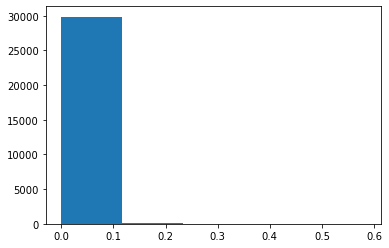

In [10]:
#Explore the values with a histogram
import matplotlib.pyplot as plt

plt.hist(scenario['summed_deaths'], bins = 5)
plt.show()

In [11]:
#Column 1 to 19 are the experiments and the summed death is the outcome. 
#Deaths is the most important criteria, this should be avoided at all time, so this outcome should be 0
x = scenario.iloc[:, 1:20]
y_deaths = scenario['summed_deaths'] < 0.000001

In [12]:
#Run the Prim algorithm, with a threshold of 0.8 and a peel_alhpa of 0.01
prim_alg = prim.Prim(x, y_deaths, threshold=0.8, peel_alpha=0.01)
box1 = prim_alg.find_box()

[MainProcess/INFO] 30000 points remaining, containing 22998 cases of interest
[MainProcess/INFO] mean: 0.9422413793103448, mass: 0.07733333333333334, coverage: 0.09505174362988086, density: 0.9422413793103448 restricted_dimensions: 14


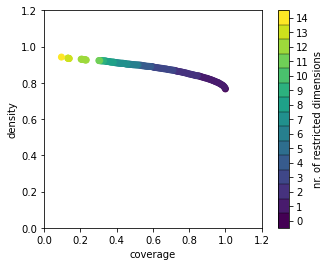

In [13]:
#Look at the trade of between coverage and density
import matplotlib.pyplot as plt
 
box1.show_tradeoff()
plt.savefig('figures/Scenario Discovery/summed_deaths.png')
plt.show()

coverage    0.872424
density     0.831841
id                20
mass           0.804
mean        0.831841
res_dim            1
Name: 20, dtype: object

             box 20                                          
                min       max                       qp values
A.5_pfail  0.196345  0.998668  [1.276006022718058e-136, -1.0]



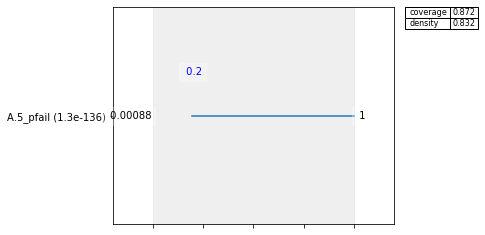

In [14]:
#Find the box with a coverage of at least 0.8 and the higest corresponding density
box1.inspect(20)
box1.inspect(20, style='graph')
plt.savefig('figures/Scenario Discovery/summed_box_deaths.png', bbox_inches = 'tight')
plt.show()

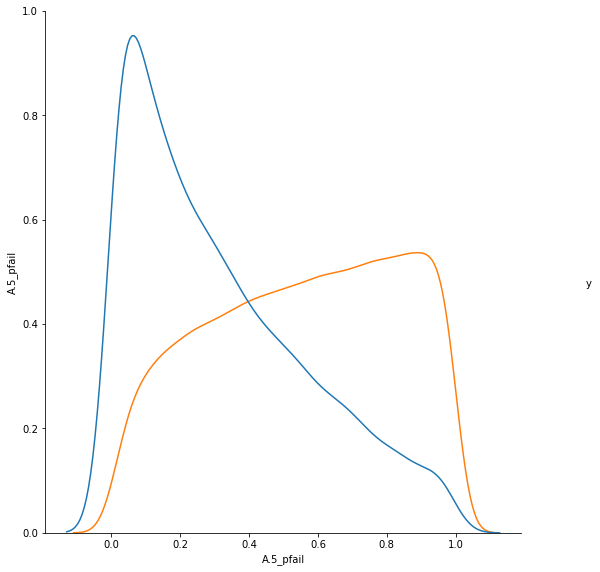

In [15]:
#Look at the graph for this case
box1.select(2)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## Summed Damage

In [16]:
#Explore the values 
print(scenario['summed_damage'].max())
print(scenario['summed_damage'].min())
print(scenario['summed_damage'].mean())
print(scenario['summed_damage'].quantile(q = 0.80))

897384404.0837902
0.0
11874978.974593565
5321374.67724956


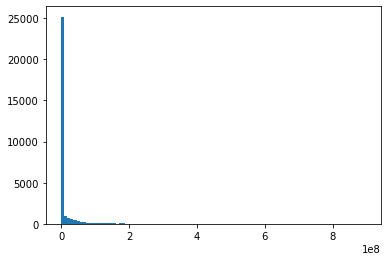

In [17]:
#Explore the values  with a histogram
import matplotlib.pyplot as plt

plt.hist(scenario['summed_damage'], bins = 100)
plt.show()

In [18]:
#Column 1 to 19 are the experiments and the summed death is the outcome. 
#Damage is the other most important criteria, this should be as loew as possible, so this outcome should be smaller than 5321374.67724956
x = scenario.iloc[:, 1:20]
y_damage = scenario['summed_damage'] < 5321374.67724956

In [19]:
#Run the Prim algorithm, with a threshold of 0.8 and a peel_alhpa of 0.01
prim_alg = prim.Prim(x, y_damage, threshold=0.8, peel_alpha=0.01)
box1 = prim_alg.find_box()

[MainProcess/INFO] 30000 points remaining, containing 24000 cases of interest
[MainProcess/INFO] mean: 0.944375, mass: 0.05333333333333334, coverage: 0.06295833333333334, density: 0.944375 restricted_dimensions: 14


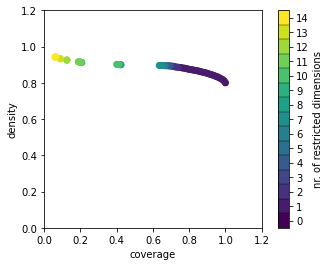

In [20]:
#Look at the trade of between coverage and density.
import matplotlib.pyplot as plt
 
box1.show_tradeoff()
plt.savefig('figures/Scenario Discovery/summed_damage.png')
plt.show()

coverage    0.960917
density     0.830764
id                 7
mass        0.925333
mean        0.830764
res_dim            1
Name: 7, dtype: object

              box 7                                         
                min       max                      qp values
A.5_pfail  0.074285  0.998668  [2.413933541088342e-39, -1.0]



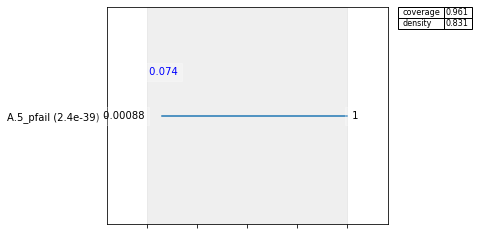

In [21]:
#Find the box with a coverage of at least 0.8 and the higest corresponding density
box1.inspect(7)
box1.inspect(7, style='graph')
plt.savefig('figures/Scenario Discovery/summed__box_damage.png', bbox_inches = 'tight')
plt.show()

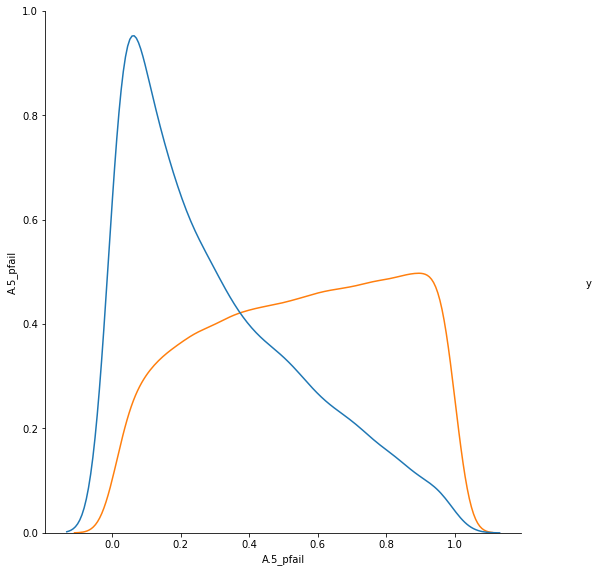

In [22]:
#Look at the graph for this case
box1.select(7)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## CART

Testing wheter using CART gives better coverage than PRIM. PRIM is better because the coverage of the CART is too low. 

In [23]:
#Import CART
from ema_workbench.analysis import cart 
cart_alg = cart.CART(x,y_deaths, 0.05)
cart_alg.build_tree()

In [24]:
#Look at the values from the CART analysis
print (cart_alg.stats_to_dataframe())
print (cart_alg.boxes_to_dataframe())

        coverage   density  res dim      mass
box 1   0.042352  0.380469        1  0.085333
box 2   0.047569  0.719737        2  0.050667
box 3   0.039656  0.542857        2  0.056000
box 4   0.044613  0.657692        2  0.052000
box 5   0.039743  0.601316        2  0.050667
box 6   0.074963  0.783636        2  0.073333
box 7   0.096226  0.864453        2  0.085333
box 8   0.049483  0.693902        2  0.054667
box 9   0.073180  0.751339        2  0.074667
box 10  0.061310  0.903846        2  0.052000
box 11  0.067354  0.880114        2  0.058667
box 12  0.054092  0.818421        2  0.050667
box 13  0.067354  0.968125        2  0.053333
box 14  0.111358  0.914643        2  0.093333
box 15  0.068702  0.940476        2  0.056000
box 16  0.062049  0.891875        2  0.053333
              box 1               box 2               box 3            \
                min       max       min       max       min       max   
A.5_pfail  0.000882  0.085594  0.085594  0.294306  0.085594  0.158303   